# create a separating line classifier

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC

In [4]:
# load training data
df = pd.read_table('../data/separable.csv')
df.head()

         x1        x2  y
0  0.168042  0.281469 -1
1  0.807516  0.786281  1
2  0.384942  0.173019 -1
3  0.327734  0.570748 -1
4  0.602101  0.419283 -1

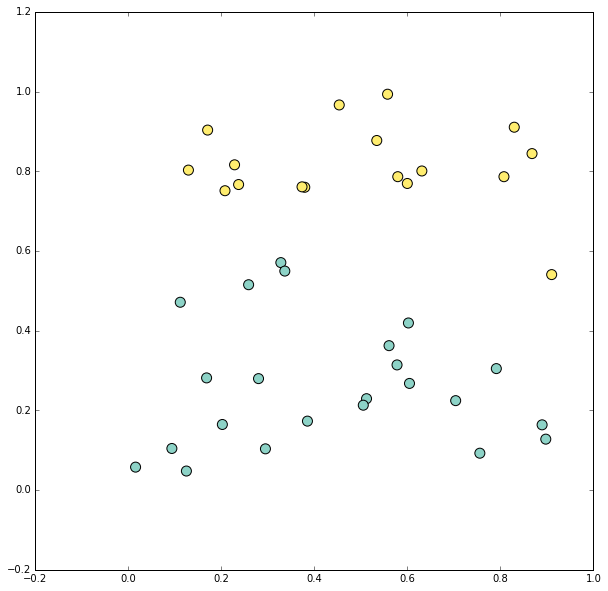

In [8]:
# plot training data
plt.figure(figsize=(10,10))
plt.scatter(df.x1, df.x2, c=df['y'], s=100, cmap=plt.cm.Set3)

def line(b0, b1):
    x1 = [0,1]
    x2 = [b0 + b1*x for x in x1]
    plt.plot(x1, x2)

## play with the line here
    

## create and plot a line that separates different colors

You have to create at least two points of x1, compute the
corresponding x2, and plot the line (use `plt.plot`).  Play with the
line intercept and slope parameters until you get a line that neatly
fits between the two different classes.

You may also play a bit more to experiment with different separating
lines. 

## SVM Classifier

In [56]:
X = df[['x1', 'x2']]
y = df.y
m = SVC(kernel='rbf', degree=7).fit(X, y)
hatY = m.predict(X)
A = np.mean(hatY == y)
print("accuracy", A)
np.stack((y, hatY), axis=1)

accuracy 0.975


array([[-1, -1],
       [ 1,  1],
       [-1, -1],
       [-1,  1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [ 1,  1],
       [-1, -1],
       [-1, -1],
       [ 1,  1],
       [ 1,  1],
       [ 1,  1],
       [ 1,  1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [ 1,  1],
       [-1, -1],
       [ 1,  1],
       [-1, -1],
       [ 1,  1],
       [-1, -1],
       [ 1,  1],
       [ 1,  1],
       [-1, -1],
       [-1, -1],
       [ 1,  1],
       [ 1,  1],
       [ 1,  1],
       [ 1,  1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [ 1,  1],
       [ 1,  1]])

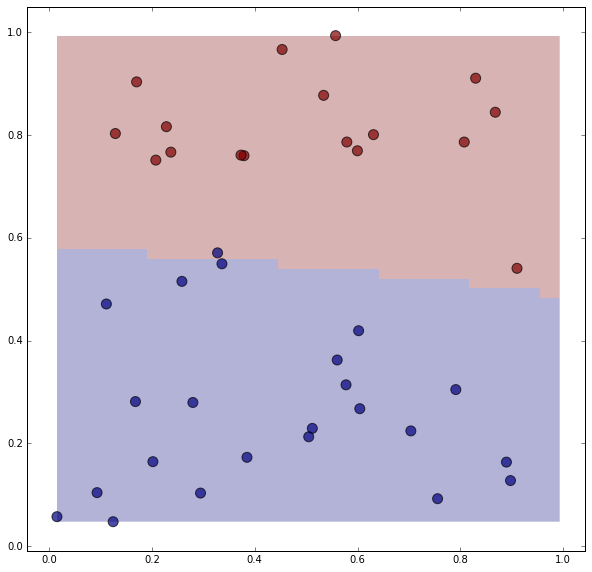

In [57]:
## Let's predict on a different data:
nGrid = 50
ex1 = np.linspace(np.min(df.x1), np.max(df.x1), nGrid)
ex2 = np.linspace(np.min(df.x2), np.max(df.x2), nGrid)
xx1, xx2 = np.meshgrid(ex1, ex2)
Xmat = np.stack((xx1.ravel(), xx2.ravel()), axis=1)
Ymat = m.predict(Xmat)
plt.figure(figsize=(10,10))
plt.imshow(Ymat.reshape((nGrid, nGrid)),
           extent=[np.min(df.x1), np.max(df.x2), np.min(df.x2), np.max(df.x2)],
           alpha=0.3, origin='lower', interpolation='none')
plt.scatter(df.x1, df.x2, c=df.y, s=100, alpha=0.7)